In [1]:
import pandas as pd


In [2]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [3]:
df=pd.read_excel("cluster_april.xlsx")

In [4]:
df

,Test,Frequency,Avg_revenue
0,Complete Blood Count,745,250.518121
1,Random Blood Sugar,536,38.516791
2,Urine Routine,481,77.688150
3,Thyroid Stimulating,391,230.496164
4,Renal Function Test (RFT),321,134.320872
...,...,...,...
141,Weil Felix Test,1,500.000000
142,Total Iron Binding Capacity,1,320.000000
143,QUADRUPLE MARKER,1,2400.000000
144,Total Proteins,1,120.000000


In [5]:
pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in c:\users\kushal\appdata\local\programs\python\python38\lib\site-packages (0.23.1)
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [6]:
import sklearn

In [7]:
from sklearn.cluster import KMeans

In [8]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [10]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [12]:
from matplotlib import pyplot as plt
%matplotlib inline

In [14]:
df

,Test,Frequency,Avg_revenue
0,Complete Blood Count,745,250.518121
1,Random Blood Sugar,536,38.516791
2,Urine Routine,481,77.688150
3,Thyroid Stimulating,391,230.496164
4,Renal Function Test (RFT),321,134.320872
...,...,...,...
141,Weil Felix Test,1,500.000000
142,Total Iron Binding Capacity,1,320.000000
143,QUADRUPLE MARKER,1,2400.000000
144,Total Proteins,1,120.000000


## Plotting on scatter plot the 2 features of each test

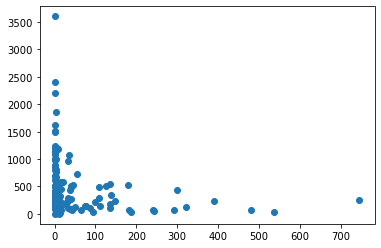

In [16]:
plt.scatter(df['Frequency'],df['Avg_revenue'])

## Scaling the data using minmaxscaler

In [25]:
scaler = MinMaxScaler()
df[['Frequency']]=scaler.fit_transform(df[['Frequency']])
df[['Avg_revenue']]=scaler.fit_transform(df[['Avg_revenue']])
df

,Test,Frequency,Avg_revenue
0,Complete Blood Count,1.000000,0.069492
1,Random Blood Sugar,0.719086,0.010684
2,Urine Routine,0.645161,0.021550
3,Thyroid Stimulating,0.524194,0.063938
4,Renal Function Test (RFT),0.430108,0.037260
...,...,...,...
141,Weil Felix Test,0.000000,0.138696
142,Total Iron Binding Capacity,0.000000,0.088766
143,QUADRUPLE MARKER,0.000000,0.665742
144,Total Proteins,0.000000,0.033287


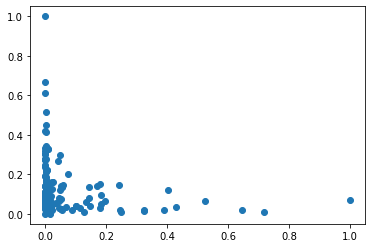

In [26]:
plt.scatter(df['Frequency'],df['Avg_revenue'])

## Finding optimum Value of k-number of clusters

In [28]:
k_rng= range(1,11)
sse=[]
for k in k_rng:
    km= KMeans(n_clusters=k)
    km.fit(df[['Frequency','Avg_revenue']])
    sse.append(km.inertia_)


In [29]:
sse

[5.761433607042133,
 3.599555849384353,
 1.874191427102756,
 1.332270211101038,
 0.8818800517904629,
 0.6865822055404742,
 0.4986755202399869,
 0.37995300427934114,
 0.3108986010613934,
 0.26319213183655765]

Text(0, 0.5, 'Sum squared error')

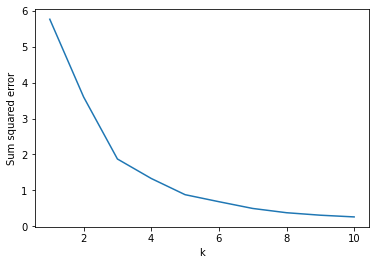

In [30]:
plt.plot(k_rng,sse)
plt.xlabel('k')
plt.ylabel('Sum squared error')


## K= 5 is selected as optimum value of cluster numbers using elow-joint analysis

In [31]:
km = KMeans(n_clusters=5)
km

KMeans(n_clusters=5)

In [33]:
y_predicted= km.fit_predict(df[['Frequency','Avg_revenue']])
y_predicted

array([3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 4,
       1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1,
       2, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 4, 2, 2, 1, 1, 1,
       2, 1, 2, 2, 1, 1, 1, 4, 1, 1, 1, 4, 1, 1])

In [34]:
df['cluster']=y_predicted
df

,Test,Frequency,Avg_revenue,cluster
0,Complete Blood Count,1.000000,0.069492,3
1,Random Blood Sugar,0.719086,0.010684,3
2,Urine Routine,0.645161,0.021550,3
3,Thyroid Stimulating,0.524194,0.063938,3
4,Renal Function Test (RFT),0.430108,0.037260,0
...,...,...,...,...
141,Weil Felix Test,0.000000,0.138696,1
142,Total Iron Binding Capacity,0.000000,0.088766,1
143,QUADRUPLE MARKER,0.000000,0.665742,4
144,Total Proteins,0.000000,0.033287,1


## plotting these 5 clusters after segregating them

In [40]:
df0= df[df['cluster']==0]
df1= df[df['cluster']==1]
df2= df[df['cluster']==2]
df3= df[df['cluster']==3]
df4= df[df['cluster']==4]

df3

,Test,Frequency,Avg_revenue,cluster
0,Complete Blood Count,1.000000,0.069492,3
1,Random Blood Sugar,0.719086,0.010684,3
2,Urine Routine,0.645161,0.021550,3
3,Thyroid Stimulating,0.524194,0.063938,3


In [41]:
df0

,Test,Frequency,Avg_revenue,cluster
4,Renal Function Test (RFT),0.430108,0.037260,0
5,"Electrolytes (Na,K,Cl)",0.401882,0.121563,0
6,Serum Creatinine,0.389785,0.020885,0
7,Blood Group & RH Factor,0.325269,0.016204,0
8,Haemoglobin (HB),0.322581,0.021028,0
9,Fasting Blood Sugar (FBS),0.248656,0.010457,0
10,OP GRBS,0.244624,0.019395,0
11,Liver Function Test (LFT),0.240591,0.145634,0
12,Serum Bilirubin,0.196237,0.063423,0
13,HIV 1 & 2 Rapid,0.184140,0.097960,0


In [42]:
df1

,Test,Frequency,Avg_revenue,cluster
23,Platelet Count,0.114247,0.032029,1
24,Serum Calcium,0.100806,0.040094,1
25,VDRL / RPR,0.099462,0.041272,1
26,Blood Urea,0.086022,0.021317,1
28,Urine Pregnancy Test,0.067204,0.033287,1
...,...,...,...,...
140,CD-4 Count,0.000000,0.055479,1
141,Weil Felix Test,0.000000,0.138696,1
142,Total Iron Binding Capacity,0.000000,0.088766,1
144,Total Proteins,0.000000,0.033287,1


In [44]:
df4

,Test,Frequency,Avg_revenue,cluster
87,Double Marker For Downs,0.002688,0.517799,4
126,ANA Profile,0.000000,1.000000,4
139,Vitamin B12,0.000000,0.610264,4
143,QUADRUPLE MARKER,0.000000,0.665742,4


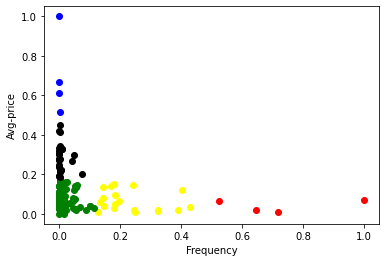

<Figure size 1440x1080 with 0 Axes>

In [51]:
plt.scatter(df0['Frequency'],df0['Avg_revenue'],color='yellow')
plt.scatter(df1['Frequency'],df1['Avg_revenue'],color='green')
plt.scatter(df2['Frequency'],df2['Avg_revenue'],color='black')
plt.scatter(df3['Frequency'],df3['Avg_revenue'],color='red')
plt.scatter(df4['Frequency'],df4['Avg_revenue'],color='blue')
plt.xlabel('Frequency')
plt.ylabel('Avg-price')
fig= plt.figure(figsize=(20,15))
plt.show()